<a href="https://colab.research.google.com/github/Telury/clase4/blob/master/clase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Importar librerías necesarias

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/13 - Trece semestre/Procesamiento de imagen/Practicas clase/clase4'
os.chdir(path)
!pwd

# graficar imagenes estaticas en el notebook
%matplotlib inline  

/content/drive/My Drive/13 - Trece semestre/Procesamiento de imagen/Practicas clase/clase4


**Funciones**

In [0]:
def readRGB(imgPath):
    img = cv2.imread(imgPath)
    img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

# Histogramas

# Histograma de escala de grises

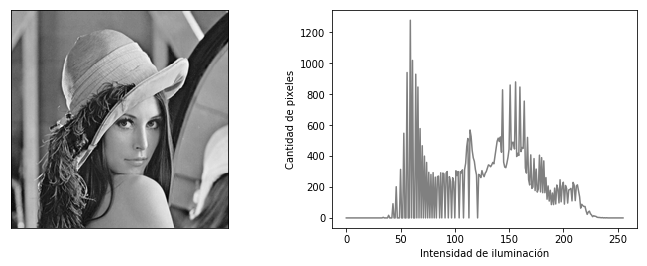

In [0]:
img = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist,color='gray')
plt.xlabel('Intensidad de iluminación')
plt.ylabel('Cantidad de pixeles')
plt.show()

# Histograma imagen a color

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


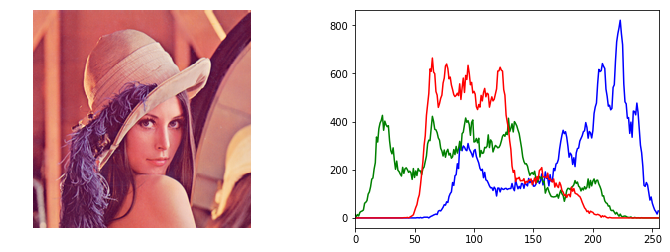

In [0]:
img = readRGB('lena.png')
color = ('b','g','r')

plt.figure(figsize=(12,4))
plt.subplot(1,2,1), plt.imshow(img)
plt.axis("off")

for i, c in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.subplot(1,2,2),plt.plot(hist, color = c)
    plt.xlim([0,256])
    

plt.show()

# Histograma con alto brillo (mucha luz)

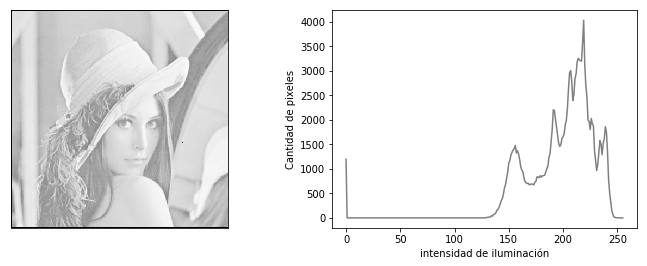

In [0]:
img = cv2.imread('lenaB.png', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist, color='gray')

plt.xlabel('intensidad de iluminación')
plt.ylabel('Cantidad de pixeles')
plt.show()

# Histograma con poco brillo (poca luz)

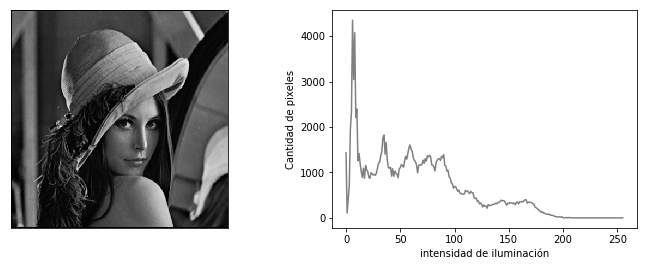

In [0]:
img = cv2.imread('lenaD.png', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist, color='gray' )

plt.xlabel('intensidad de iluminación')
plt.ylabel('Cantidad de pixeles')
plt.show()

# Ecualizar una imagen - Imagen con mucho brillo ecualizada

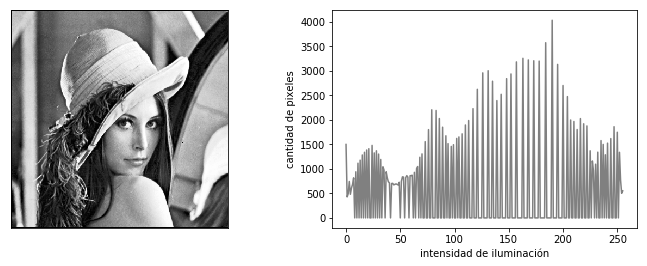

In [0]:
img = cv2.imread('lenaB.png', cv2.IMREAD_GRAYSCALE)
img = cv2.equalizeHist(img)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist, color='gray' )

plt.xlabel('intensidad de iluminación')
plt.ylabel('cantidad de pixeles')
plt.show()

# Imagen oscura ecualizada

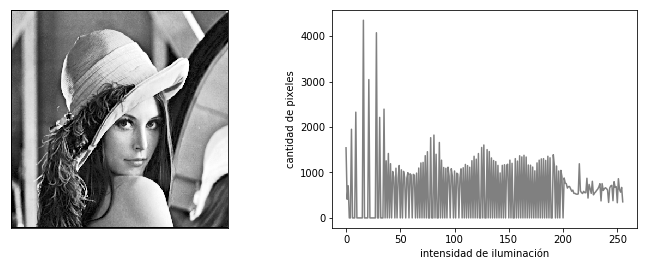

In [0]:
img = cv2.imread('lenaD.png', cv2.IMREAD_GRAYSCALE)
img = cv2.equalizeHist(img)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.plot(hist, color='gray' )

plt.xlabel('intensidad de iluminación')
plt.ylabel('cantidad de pixeles')
plt.show()

# Histogramas aplicando máscaras en las imágenes

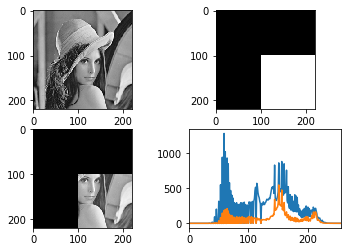

In [0]:
img = cv2.imread('lena.png',0)

# crear mascara
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calcular histograma con y sin mascara
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()



---



# Ejercicio en clase - Sujeto a corrección

*   Buscar 4 imágenes
*   2 aumentar blancos
*   2 aumentar negros
*   Ecualizar las 4 imágenes
*   Gráficas:
    * Imagen original - Histograma original
    * Imagen transformada - Histograma transformado
    * Imagen ecualizada - Histograma ecualizado
*   Enmascarar 1 de las 4 imágenes y realizar histograma

**Aumento de blancos (Aumentar el brillo)**

In [0]:
import numpy as np
import cv2

# Método para mostrar la imagen
def displayGray2(a, title1 = "Original"):
  plt.figure(figsize=(8,8))
  plt.subplot(121), plt.imshow(a,cmap="gray"), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b,cmap="gray"), plt.title(title2)
  plt.show()

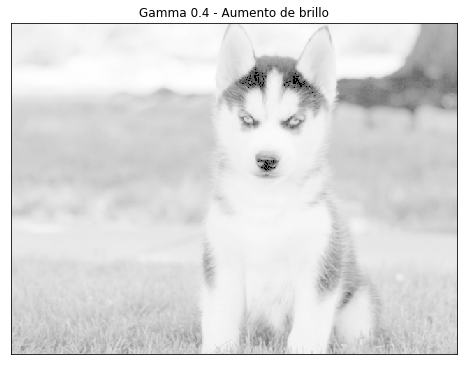

In [0]:
import numpy as np
import cv2

def displayGray2(a, title1 = "Original"):
  plt.figure(figsize=(8,8))
  plt.imshow(a,cmap="gray"), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.show()

# Load the image
img = cv2.imread('imgA.jpg',cv2.IMREAD_GRAYSCALE)
# Similarly, Apply Gamma=0.2 
gamma_point_four = np.array(255*(img/255)**0.2,dtype='uint8')
# Display the images in subplots
displayGray2(gamma_point_four,'Gamma 0.4 - Aumento de brillo')

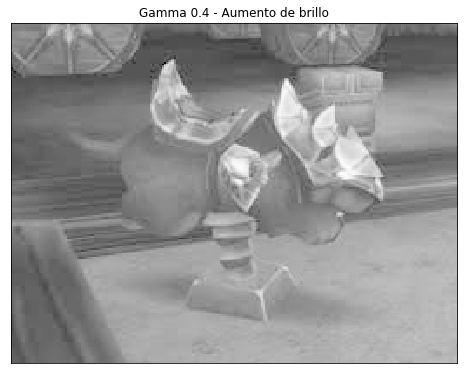

In [0]:
# Load the image
img = cv2.imread('imgB.jpg',cv2.IMREAD_GRAYSCALE)
# Similarly, Apply Gamma=0.2 
gamma_point_four = np.array(255*(img/255)**0.4,dtype='uint8')
# Display the images
displayGray2(gamma_point_four,'Gamma 0.4 - Aumento de brillo')

**Aumento de negros (Disminuir el brillo)**

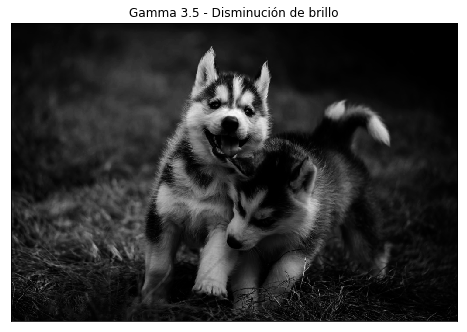

In [0]:
# Load the image
img = cv2.imread('imgC.jpg',cv2.IMREAD_GRAYSCALE)
# Similarly, Apply Gamma=2.5 
gamma_three_point_five = np.array(255*(img/255)**3.5,dtype='uint8')
# Display the images
displayGray2(gamma_three_point_five,'Gamma 3.5 - Disminución de brillo')

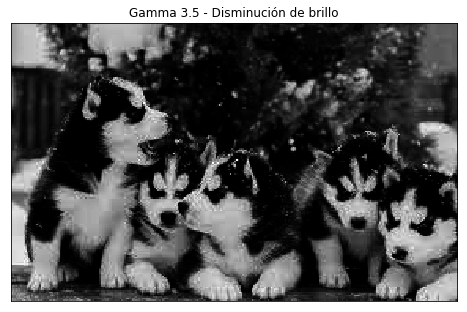

In [0]:
# Load the image
img = cv2.imread('imgD.jpg',cv2.IMREAD_GRAYSCALE)
# Similarly, Apply Gamma=2.5 
gamma_three_point_five = np.array(255*(img/255)**3.5,dtype='uint8')
# Display the images
displayGray2(gamma_three_point_five,'Gamma 3.5 - Disminución de brillo')

**Ecualizar las 4 imágenes**

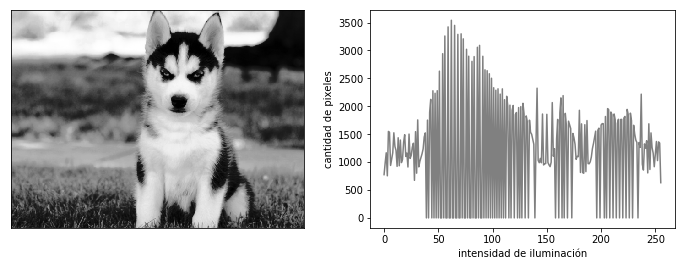

In [0]:
img = cv2.imread('imgA.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.equalizeHist(img)

hist = cv2.calcHist([img],[0], None, [256], [0,256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.plot(hist,color='gray')
plt.xlabel('intensidad de iluminación')
plt.ylabel('cantidad de pixeles')
plt.show()

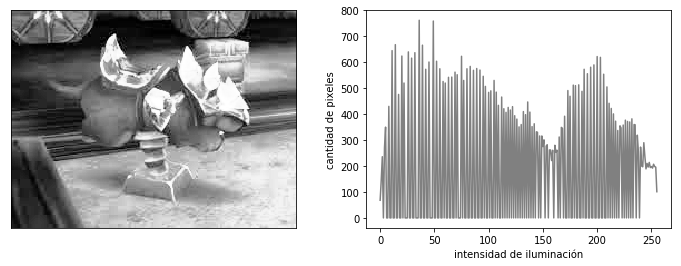

In [0]:
img = cv2.imread('imgB.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.equalizeHist(img)

hist = cv2.calcHist([img],[0], None, [256], [0,256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.plot(hist,color='gray')
plt.xlabel('intensidad de iluminación')
plt.ylabel('cantidad de pixeles')
plt.show()

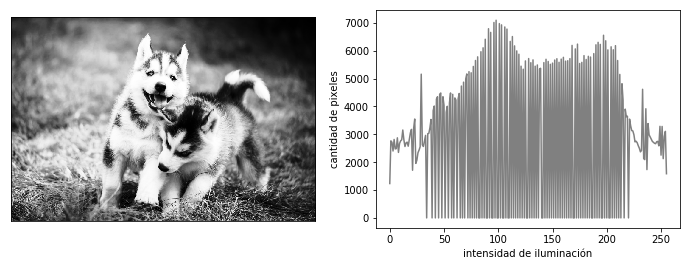

In [0]:
img = cv2.imread('imgC.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.equalizeHist(img)

hist = cv2.calcHist([img],[0], None, [256], [0,256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.plot(hist,color='gray')
plt.xlabel('intensidad de iluminación')
plt.ylabel('cantidad de pixeles')
plt.show()

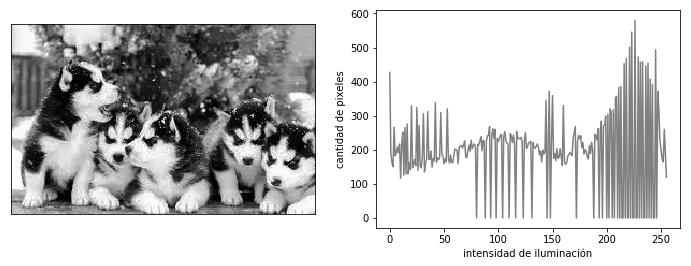

In [0]:
img = cv2.imread('imgD.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.equalizeHist(img)

hist = cv2.calcHist([img],[0], None, [256], [0,256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.plot(hist,color='gray')
plt.xlabel('intensidad de iluminación')
plt.ylabel('cantidad de pixeles')
plt.show()

**Imagen original - Histograma original**

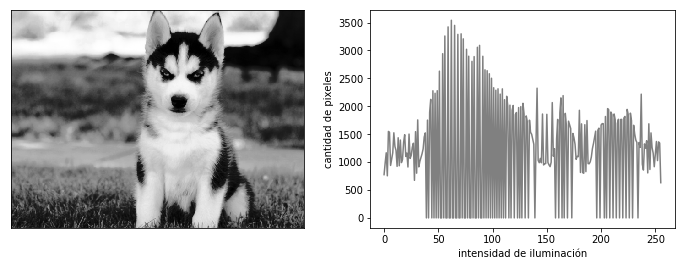

In [0]:
img = cv2.imread('imgA.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.equalizeHist(img)

hist = cv2.calcHist([img],[0], None, [256], [0,256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.plot(hist,color='gray')
plt.xlabel('intensidad de iluminación')
plt.ylabel('cantidad de pixeles')
plt.show()

**Imagen transformada - Histograma transformado**

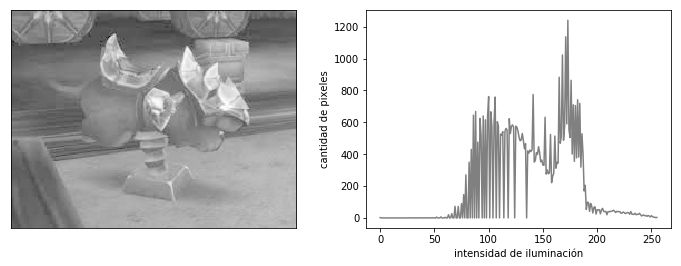

In [0]:
# Load the image
img = cv2.imread('imgB.jpg',cv2.IMREAD_GRAYSCALE)
# Similarly, Apply Gamma=0.2 
gamma_point_four = np.array(255*(img/255)**0.4,dtype='uint8')

hist = cv2.calcHist([gamma_point_four],[0], None, [256], [0,256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(gamma_point_four,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.plot(hist,color='gray')
plt.xlabel('intensidad de iluminación')
plt.ylabel('cantidad de pixeles')
plt.show()


**Imagen ecualizada - Histograma ecualizado**


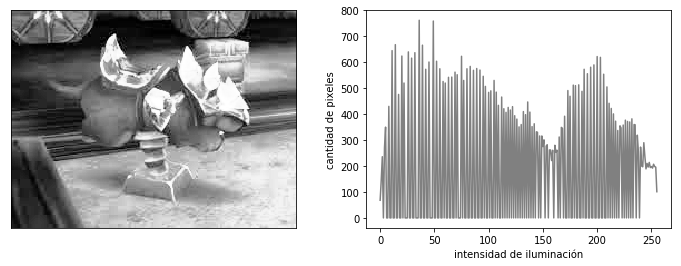

In [0]:
img = cv2.imread('imgB.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.equalizeHist(img)

hist = cv2.calcHist([img],[0], None, [256], [0,256])

plt.figure(figsize=(12,4))
plt.subplot(121), plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.plot(hist,color='gray')
plt.xlabel('intensidad de iluminación')
plt.ylabel('cantidad de pixeles')
plt.show()

**Enmascarar 1 de las 4 imágenes y realizar histograma**

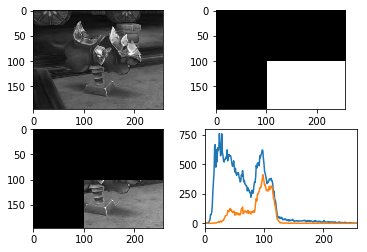

In [0]:
img = cv2.imread('imgB.jpg',0)

# Crear máscara
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calcular histograma con y sin máscara
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img,'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img,'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()